<a href="https://colab.research.google.com/github/subhashuRT/MTP/blob/master/Classification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "drive/My Drive/"

/content/drive/My Drive


In [ ]:
!unzip "Split_image.zip"

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Activation
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3)))
classifier.add(Activation("relu"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(64))
classifier.add(Activation("relu"))

classifier.add(Dense(10))
classifier.add(Activation("softmax"))

print(classifier)
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,fill_mode = "nearest")
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Split_image/train',
                                                 target_size = (64, 64),
                                                 batch_size = 40,
                                                 class_mode = 'categorical')
#Validation
test_set = test_datagen.flow_from_directory('Split_image/val',
                                            target_size = (64, 64),
                                            batch_size = 40,
                                            class_mode = 'categorical')

#test/No output available
test_set1 = test_datagen.flow_from_directory('Split_image/test',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 194168 images belonging to 10 classes.
Found 41388 images belonging to 10 classes.
Found 41397 images belonging to 10 classes.


In [ ]:

classifier.fit_generator(training_set,steps_per_epoch = 15,epochs = 50,validation_data = test_set,validation_steps = 100)

Epoch 1/50
15/15 [==============================] - 64s 4s/step - loss: 2.3082 - accuracy: 0.1283 - val_loss: 2.2955 - val_accuracy: 0.1567
Epoch 2/50
15/15 [==============================] - 54s 4s/step - loss: 2.2762 - accuracy: 0.1400 - val_loss: 2.2576 - val_accuracy: 0.1325
Epoch 3/50
15/15 [==============================] - 39s 3s/step - loss: 2.2659 - accuracy: 0.1217 - val_loss: 2.2237 - val_accuracy: 0.1402
Epoch 4/50
15/15 [==============================] - 47s 3s/step - loss: 2.2671 - accuracy: 0.1517 - val_loss: 2.2643 - val_accuracy: 0.1632
Epoch 5/50
15/15 [==============================] - 43s 3s/step - loss: 2.2834 - accuracy: 0.1267 - val_loss: 2.2476 - val_accuracy: 0.1443
Epoch 6/50
15/15 [==============================] - 41s 3s/step - loss: 2.2555 - accuracy: 0.1533 - val_loss: 2.2514 - val_accuracy: 0.1558
Epoch 7/50
15/15 [==============================] - 46s 3s/step - loss: 2.2501 - accuracy: 0.1733 - val_loss: 2.2066 - val_accuracy: 0.1630
Epoch 8/50
15/15 [==

In [ ]:
import skimage
import numpy as np
from keras.preprocessing import image
from skimage import filters
import matplotlib.pyplot as plt 
import cv2


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


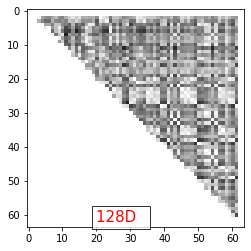

In [ ]:
a = "/content/drive/My Drive/Split_image/test/128D/128D_1_018.png"
pred(a)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


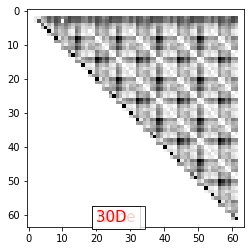

In [ ]:
a = "Split_image/test/30D/30D_1_18.png"
pred(a)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


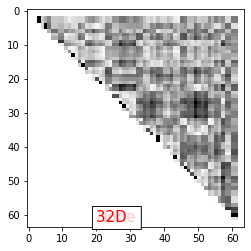

In [ ]:
a = "Split_image/test/32D/32D_1_04.png"
pred(a)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


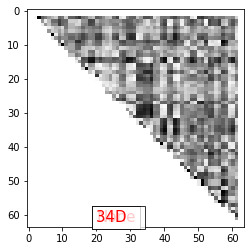

In [ ]:
a = "Split_image/test/34D/34D_1_014.png"
pred(a)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


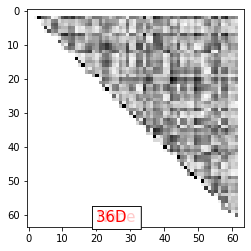

In [ ]:
a = "Split_image/test/36D/36D_1_12.png"
pred(a)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


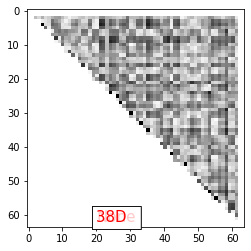

In [ ]:
a = "Split_image/test/38D/38D_1_22.png"
pred(a)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


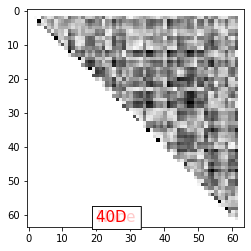

In [ ]:
a = "Split_image/test/40D/40D_1_12.png"
pred(a)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


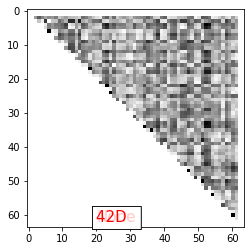

In [ ]:
a = "Split_image/test/42D/42D_1_26.png"
pred(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


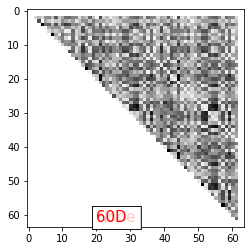

In [ ]:
a = "Split_image/test/60D/60D_1_35.png"
pred(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


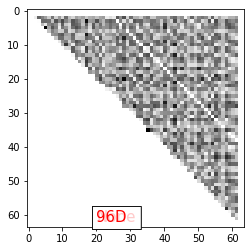

In [ ]:
a = "Split_image/test/96D/96D_1_39.png"
pred(a)

In [ ]:
print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
activation_4 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

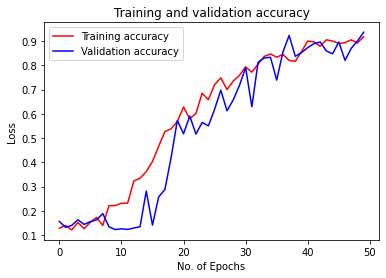

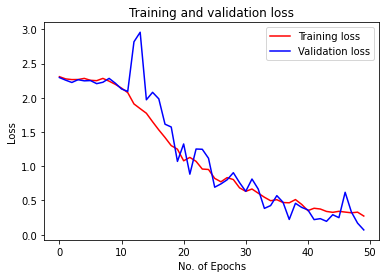

In [ ]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
accuracy = classifier.history.history['accuracy']
val_accuracy = classifier.history.history['val_accuracy']
loss = classifier.history.history['loss']
val_loss = classifier.history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def pred(a):
  from skimage import filters
  import matplotlib.pyplot as plt 
  import cv2
  
  im = cv2.imread(a,0)
  #cv2.imshow("a")
  #cv2.waitKey(0)
  #im = cv2.imread("adorable-animal-cat-1741205.jpg")
  first_image = np.array(im, dtype='float')
  pixels = first_image
  #plt.imshow(pixels, cmap='gray')
  img1 = image.load_img(a,target_size=(64, 64) )
  
  test_image = image.load_img(a,target_size=(64, 64))
  #img1 = image.load_img("adorable-animal-cat-1741205.jpg",target_size = (64,64))
  #test_image = image.load_img("adorable-animal-cat-1741205.jpg", target_size = (64,64))
  plt.show()
  test_image = image.img_to_array(test_image)
  
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  #training_set.class_indices
  print(result)
  for i in range(len(result[0])):
    if result[0][i] >0.9:
        
      #print("i is =",i)
        
        lis = ["128D  ","30D   ","32D  ","34D   ","36D  ","38D  ","40D  ","42D  ","60D  ","96D  "]
        value = lis[i]
        dic = { }
        plt.text(20,62,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8))
        break
    else:
      
      value = "None"
      plt.text(20,62,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8))
      
  
  plt.imshow(img1)
  plt.show()

In [ ]:
ls


'101 Dynamite Answers to Interview Questions.pdf'
 11701067557.pdf
 183100059.rar
'20191218_Employee Information Form (002).xlsm'
 21731815_1428538273901076_5461431284362031129_o.jpg
 Btp/
'Colab Notebooks'/
 cuttingtool.pdf
 Degree.compressed.pdf
'Degree, passing certificate.pdf'
'Dislocation data'/
 doc/
 ENGG_2017_CutOff_316.pdf
 Ese/
 Fearless.Interviewing-How.to.Win.the.Job.by.Marky.Stein.pdf
 Gate/
'Ies master full test'/
'Ies master part test'/
 IMG_20150210_201706.jpg
 IMG_20170923_205112_HDR.jpg
 IMG_20180222_174759.jpg
 IMG_20180222_185544.jpg
 IMG_20191227_184713.jpg
 Kachra2/
 Lecture-Gear.pdf
 Lonavala/
'non-conventional-energy-source-b-h-khan- By www.EasyEngineering.net export.pdf'
'O riely book'/
'rpsc Application Preview.pdf'
'rpsc Fee Receipt.pdf'
 Rr/
 S2_2016E.pdf
 S3_2016.pdf
 sagar.mp4
'sambhar holi.mp4'
 sbh11.jpg
 Screenshot_2017-04-28-20-14-42-940_com.android.chrome.png
 Screenshot_2017-09-15-18-08-06-005_com.android.chrome.png
 Screenshot_2018-02-02-16-52-26-94